# Autocorrect
You use autocorrect every day on your cell phone and computer. In this assignment, you will explore what really goes on behind the scenes. Of course, the model you are about to implement is not identical to the one used in your phone, but it is still quite good. 

- For example, if you type in the word **"I am lerningg"**, chances are very high that you meant to write **"learning"**, as shown in **Figure 1**.


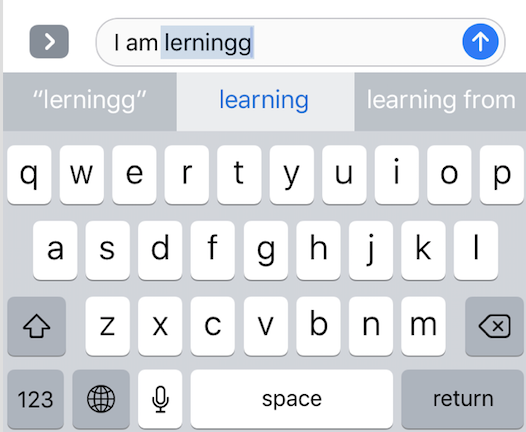


# Part 1: Data Preprocessing 

In [2]:
import re
from collections import Counter
import numpy as np
import pandas as pd

In [3]:
data = pd. read_csv("shakespeare.txt", sep="\t")
print(data.shape)

data.head(19)


(6672, 1)


,"O for a Muse of fire, that would ascend"
0,"The brightest heaven of invention,"
1,"A kingdom for a stage, princes to act"
2,And monarchs to behold the swelling scene!
3,"Then should the warlike Harry, like himself,"
4,"Assume the port of Mars; and at his heels,"
5,"Leash'd in like hounds, should famine, sword a..."
6,"Crouch for employment. But pardon, and gentles..."
7,The flat unraised spirits that have dared
8,On this unworthy scaffold to bring forth
9,So great an object: can this cockpit hold


In [4]:
def process_data(file_name):
   
    words = [] 
    
    with open(file_name, "r") as f:
        content = f.read().lower()
    
    words = re.findall('\w+',content)
    
    return words

In [5]:
word_l = process_data('shakespeare.txt')
vocab = set(word_l)  # this will be your new vocabulary
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['o', 'for', 'a', 'muse', 'of', 'fire', 'that', 'would', 'ascend', 'the']
There are 6116 unique words in the vocabulary.


In [7]:
def get_count(word_l):
    
    
    word_count_dict = {} 
    for word in word_l:
        if word not in word_count_dict:
            word_count_dict[word] = 1
        else:
            word_count_dict[word] += 1
    
   
    return word_count_dict

In [8]:

word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee')}")

There are 6116 key values pairs
The count for the word 'thee' is 240


In [9]:
def get_probs(word_count_dict):

    probs = {}  
    M = np.sum(list(word_count_dict.values()))
    
    
    for word, C in word_count_dict.items():
        probs[word] =  float(C) / M
   
    return probs

In [10]:
probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('thee') is {probs['thee']:.4f}")

Length of probs is 6116
P('thee') is 0.0045



# Part 2: String Manipulations

 


In [11]:
def delete_letter(word, verbose=False):
   
    
    delete_l = []
    split_l = []
   
    split_l = [(word[:i],word[i:]) for i in range(len(word) + 1)]
    delete_l = [L + R[1:] for L,R in split_l if R]
    
    

    if verbose: print(f"input word {word}, \nsplit_l = {split_l}, \ndelete_l = {delete_l}")

    return delete_l

In [12]:
delete_word_l = delete_letter(word="cans",
                        verbose=True)

input word cans, 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's'), ('cans', '')], 
delete_l = ['ans', 'cns', 'cas', 'can']


In [13]:
# test # 2
print(f"Number of outputs of delete_letter('at') is {len(delete_letter('at'))}")

Number of outputs of delete_letter('at') is 2


In [14]:

def switch_letter(word, verbose=False):
   
    
    switch_l = []
    split_l = []
    
    
    def f(L,R):
        return L[:-1] + R[0] + L[-1] + R[1:]
  
    split_l = [(word[:i],word[i:]) for i in range(len(word) + 1)]
    switch_l = [f(L,R) for L,R in split_l if L and R]
    

    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}") 

    return switch_l

In [15]:
switch_word_l = switch_letter(word="eta",
                         verbose=True)

Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a'), ('eta', '')] 
switch_l = ['tea', 'eat']


In [16]:
# test # 2
print(f"Number of outputs of switch_letter('at') is {len(switch_letter('at'))}")

Number of outputs of switch_letter('at') is 1


In [17]:
def replace_letter(word, verbose=False):
    
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = []
    
    split_l = [(word[:i],word[i:]) for i in range(len(word) + 1)]
    replace_set = [L + C + R[1:] for L,R in split_l if R for C in letters if C is not R[0]]
    

    replace_l = sorted(list(replace_set))
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l {replace_l}")   
    
    return replace_l

In [20]:

def insert_letter(word, verbose=False):
  
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = []
    
    split_l = [(word[:i],word[i:]) for i in range(len(word) + 1)]
    insert_l = [L + C + R for L, R in split_l for C in letters]


    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    
    return insert_l

# Part 3: Combining the edits

In [23]:

def edit_one_letter(word, allow_switches = True):
   
    
    edit_one_set = set()


    edit_one_set = edit_one_set | set(delete_letter(word)) | set(insert_letter(word)) | set(replace_letter(word))
    
    if allow_switches:
        edit_one_set |= set(switch_letter(word))


    return edit_one_set

In [25]:

def edit_two_letters(word, allow_switches = True):

    
    edit_two_set = set()
    
    
    one_letter =  edit_one_letter(word,allow_switches)
    
    for word in one_letter:
        edit_two_set |= edit_one_letter(word,allow_switches)
    

    
    return edit_two_set


# Part4: suggest spelling suggestions



In [28]:

def get_corrections(word, probs, vocab, n=2, verbose = False):
   
    
    suggestions = []
    n_best = []
    
    if word in vocab:
        suggestions = [(word, probs[word])]
    else:
        suggestions = [(_, probs[_]) for _ in edit_one_letter(word) if _ in vocab] or  \
                    [(_, probs[_]) for _ in edit_two_letter(word) if _ in vocab] or \
                    [(word,0)]
    
    n_best = sorted(suggestions, key = lambda x : x[-1], reverse = True)[:n]
    

    
    if verbose: print("suggestions = ", suggestions)

    return n_best

# Results
### feel free to try other words in my word

In [50]:

my_word = 'dgs' 
tmp_corrections = get_corrections(my_word, probs, vocab, 2, verbose=True)
for i, word_prob in enumerate(tmp_corrections):
    print(f"word {i}: {word_prob[0]}, \nprobability {word_prob[1]:.6f}")


suggestions =  [('dogs', 1.865184466743761e-05)]
word 0: dogs, 
probability 0.000019
